In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import os

In [ ]:
# Read in data, set DataFrame columns to names above
columns = ['year', 'month', 'day', 'carrier', 'tailNum', 'flNum', 'origin', 'dest', 'crsDepTime',
                   'actDepTime', 'depNextDay', 'crsArrTime', 'actArrTime', 'arrNextDay', 'cancelled', 'diverted']#setting column names
flights = pd.read_csv("/content/flight-data (2).csv",names =columns)
flights.head()#displaying first 5 rows

,year,month,day,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,depNextDay,crsArrTime,actArrTime,arrNextDay,cancelled,diverted
0,2021,4,11,AS,N309AS,792,SEA,DTW,1010,1013.0,0,1730,1736.0,0,0.0,0.0
1,2021,4,11,AS,N408AS,1011,ORD,SEA,700,703.0,0,940,916.0,0,0.0,0.0
2,2021,4,11,AS,N520AS,1012,SEA,MSP,1830,1825.0,0,2345,2337.0,0,0.0,0.0
3,2021,4,11,AS,N472AS,1013,ORD,SEA,1405,1404.0,0,1645,1627.0,0,0.0,0.0
4,2021,4,11,AS,N237AK,1014,SEA,ORD,1045,1054.0,0,1650,1652.0,0,0.0,0.0


In [ ]:
print("Flight data: %8d rows,  %d columns" % (flights.shape[0], flights.shape[1]))

Flight data:  5068847 rows,  16 columns


In [ ]:
numArrDTW = flights[flights['dest'] == 'DTW'].shape[0] # caluculating no of flights arrivals in DTW
numDepDTW = flights[flights['origin'] == 'DTW'].shape[0] # calculating no of flights departuring in DTW
print("DTW flights:   %7d arrivals,  %7d departures" % (numArrDTW, numDepDTW))

DTW flights:    648915 arrivals,   648900 departures


In [ ]:
numArrMSP =flights[flights['dest'] == 'MSP'].shape[0]# finding no of flights arrivals in MSP
numDepMSP = flights[flights['origin'] == 'MSP'].shape[0]# finding no of flights departing in MSp
print("MSP flights:   %7d arrivals,  %7d departures" % (numArrMSP, numDepMSP))

MSP flights:    644458 arrivals,   644514 departures


In [ ]:
numArrORD = flights[flights['dest'] == 'ORD'].shape[0]# finding no of flights arrivals in ORD
numDepORD = flights[flights['origin'] == 'ORD'].shape[0]## finding no of flights departed in ORD
print("ORD flights:   %7d arrivals,  %7d departures" % (numArrORD, numDepORD))

ORD flights:   1311813 arrivals,  1312017 departures


In [ ]:
# For DTW
numCanArrDTW = flights[(flights['dest'] == 'DTW') & (flights['cancelled'] == 1)].shape[0]
numCanDepDTW = flights[(flights['origin'] == 'DTW') & (flights['cancelled'] == 1)].shape[0]
numDivArrDTW = flights[(flights['dest'] == 'DTW') & (flights['diverted'] == 1)].shape[0]
numDivDepDTW = flights[(flights['origin'] == 'DTW') & (flights['diverted'] == 1)].shape[0]
print("DTW cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps"
      % (numCanArrDTW, numCanDepDTW, numDivArrDTW, numDivDepDTW))

DTW cancelled flights:    9325 arrs,    9264 deps
	diverted flights:     739 arrs,    1459 deps


In [ ]:
# For MSP
numCanArrMSP = flights[(flights['dest'] == 'MSP') & (flights['cancelled'] == 1)].shape[0]
numCanDepMSP = flights[(flights['origin'] == 'MSP') & (flights['cancelled'] == 1)].shape[0]
numDivArrMSP = flights[(flights['dest'] == 'MSP') & (flights['diverted'] == 1)].shape[0]
numDivDepMSP = flights[(flights['origin'] == 'MSP') & (flights['diverted'] == 1)].shape[0]

print("MSP cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps"
      % (numCanArrMSP, numCanDepMSP, numDivArrMSP, numDivDepMSP))

MSP cancelled flights:    9337 arrs,    9298 deps
	diverted flights:    1019 arrs,    1555 deps


In [ ]:
# For ORD
numCanArrORD = flights[(flights['dest'] == 'ORD') & (flights['cancelled'] == 1)].shape[0]
numCanDepORD = flights[(flights['origin'] == 'ORD') & (flights['cancelled'] == 1)].shape[0]
numDivArrORD = flights[(flights['dest'] == 'ORD') & (flights['diverted'] == 1)].shape[0]
numDivDepORD = flights[(flights['origin'] == 'ORD') & (flights['diverted'] == 1)].shape[0]

print("ORD cancelled flights: %7d arrs, %7d deps\n\tdiverted flights: %7d arrs, %7d deps"
      % (numCanArrORD, numCanDepORD, numDivArrORD, numDivDepORD))

ORD cancelled flights:   36875 arrs,   35638 deps
	diverted flights:    3258 arrs,    3307 deps


The absolute number of cancelled and diverted flights can be somewhat misleading because O'hare has many more flights in total.  

So, let's look at these values normalized, that is, the percentage of total arriving or departing flights that are cancelled or diverted.

In [ ]:
d = np.array([[numCanArrDTW / numArrDTW *100, numCanDepDTW / numDepDTW *100,
               numDivArrDTW / numArrDTW *100, numDivDepDTW / numDepDTW *100],
              [numCanArrMSP / numArrMSP *100, numCanDepMSP / numDepMSP *100,
               numDivArrMSP / numArrMSP *100, numDivDepMSP / numDepMSP *100],
              [numCanArrORD / numArrORD *100, numCanDepORD / numDepORD *100,
               numDivArrORD / numArrORD *100, numDivDepORD / numDepORD *100]])
canDivFls = pd.DataFrame(data=d,
                        columns = ['PercArrCan', 'PercDepCan', 'PercArrDiv',
                                   'PercDepDiv'],
                        index = ['DTW', 'MSP', 'ORD'])
canDivFls

,PercArrCan,PercDepCan,PercArrDiv,PercDepDiv
DTW,1.437014,1.427647,0.113882,0.224842
MSP,1.448814,1.442637,0.158117,0.241267
ORD,2.810995,2.716276,0.248359,0.252055


In [ ]:
# Remove the cancelled and diverted flights.
flights = flights.drop(flights[flights['cancelled']==1].index) # deleting records of number of flights cancelled
flights = flights.drop(flights[flights['diverted']==1].index) # deleting records of number of flights departed
flights.reset_index(drop=True)
print("Flight data:   %8d rows" % flights.shape[0])

Flight data:    4950620 rows


In [ ]:
def extract_hour(time):

    hours=time//100

    return hours
print(extract_hour(1450))
print(extract_hour(flights['actDepTime'][100:200]))


100    10.0
101     7.0
102    18.0
103    13.0
104    10.0
       ... 
195    18.0
196    10.0
197     7.0
198    18.0
199    14.0
Name: actDepTime, Length: 100, dtype: float64

In [ ]:
def extract_min(time):

    mins=time%100
    return mins

print(extract_min(1450))
print(extract_min(flights['actDepTime'][100:200]))
print(extract_min(flights['crsDepTime']))

50
100     7.0
101    20.0
102    23.0
103    58.0
104    44.0
       ... 
195    30.0
196     8.0
197     2.0
198    28.0
199     4.0
Name: actDepTime, Length: 100, dtype: float64
0          10
1           0
2          30
3           5
4          45
           ..
5068842    30
5068843    15
5068844    25
5068845    50
5068846    15
Name: crsDepTime, Length: 5068847, dtype: int64


Here are some examples of usage:

```
>>> extract_hour(1450)
>>> extract_hour(flights['actDepTime'][100:200])
>>> extract_hour(flights['crsDepTime'])
>>> extract_mins(1450)
>>> extract_mins(flights['actDepTime'][100:200])
>>> extract_mins(flights['crsDepTime'])
```

In [ ]:
def convert_to_minofday(time):
    # make use of the functions you wrote above: extract_hour, extract_min
    minOfDay = extract_hour(time)*60+extract_min(time)
    return minOfDay
convert_to_minofday(1450)

890

In [ ]:
def calc_time_diff(x, y, nextDay):
    """
    Calculate the time difference, y - x, accounting for nextDay changes.

    Input:
        x,y (float64 or int64): Series of scheduled time given in hhmm format.
          Takes on values in 0.0-2400.0 due to float64 representation or
          values in 0-2400 in int64 representation
        nextDay (int): Series of next day indicator, takes on values: -1, 0, 1, 2

    Returns:
        array (float64): array of input dimension with delay time


    Example: 1303 is converted to 783
             1305 is converted to 785
    >>> calc_time_diff(pd.Series([1303]), pd.Series([1305]), pd.Series([0]))
    2

    Example: 2320.0 is converted to 1400.0
               37.0 is converted to    37.0
    >>> calc_time_diff(pd.Series([2320.0]), pd.Series([37.0]), pd.Series([1]))
    77.0
    """
    # make use of the convert_to_minofday function

    diff = convert_to_minofday(y) - convert_to_minofday(x)
    diff += 1440 * (nextDay == -1)
    diff += 1440 * (nextDay == 1)
    diff += 2880 * (nextDay == 2)
    return diff
calc_time_diff(pd.Series([1303]), pd.Series([1305]), pd.Series([0]))


0    2
dtype: int64

In [ ]:
flights['depDelay'] = calc_time_diff(flights['crsDepTime'], flights['actDepTime'],flights['depNextDay'])
flights['arrDelay'] = calc_time_diff(flights['crsArrTime'], flights['actArrTime'],flights['arrNextDay'])

In [ ]:
flights.head()

,year,month,day,carrier,tailNum,flNum,origin,dest,crsDepTime,actDepTime,depNextDay,crsArrTime,actArrTime,arrNextDay,cancelled,diverted,depDelay,arrDelay
0,2021,4,11,AS,N309AS,792,SEA,DTW,1010,1013.0,0,1730,1736.0,0,0.0,0.0,3.0,6.0
1,2021,4,11,AS,N408AS,1011,ORD,SEA,700,703.0,0,940,916.0,0,0.0,0.0,3.0,-24.0
2,2021,4,11,AS,N520AS,1012,SEA,MSP,1830,1825.0,0,2345,2337.0,0,0.0,0.0,-5.0,-8.0
3,2021,4,11,AS,N472AS,1013,ORD,SEA,1405,1404.0,0,1645,1627.0,0,0.0,0.0,-1.0,-18.0
4,2021,4,11,AS,N237AK,1014,SEA,ORD,1045,1054.0,0,1650,1652.0,0,0.0,0.0,9.0,2.0


In [ ]:
# Using your the new column flights['depDelay'] to filter the number of
#  flights delayed over 75 minutes for each airport.

# Report the number and the percentage for each airport.

delayedDTW = flights[flights['origin']=='DTW'].shape[0]
numDepMSP  = flights[flights['origin']=='MSP'].shape[0]
numDepORD  = flights[flights['origin']=='ORD'].shape[0]

delayedDTW = flights[(flights['depDelay']>=75) & (flights['origin']=='DTW')].shape[0] # filtering flights that delayed more than 75 in DTW

delayedMSP = flights[(flights['depDelay']>=75) & (flights['origin']=='MSP')].shape[0] # filtering flights that delayed more than 75 in MSP

delayedORD = flights[(flights['depDelay']>=75) & (flights['origin']=='ORD')].shape[0] # filtering flights that delayed more than 75 in ORD


print("DTW delayed flights:  %7d, %3.3f%%" % (delayedDTW, delayedDTW/numDepDTW*100))
print("MSP delayed flights:  %7d, %3.3f%%" % (delayedMSP, delayedMSP/numDepMSP*100))
print("ORD delayed flights:  %7d, %3.3f%%" % (delayedORD, delayedORD/numDepORD*100))

DTW delayed flights:    26046, 4.014%
MSP delayed flights:    21560, 3.345%
ORD delayed flights:    70076, 5.341%


Text(0.5, 1.0, 'Arrival delay for DTW ')

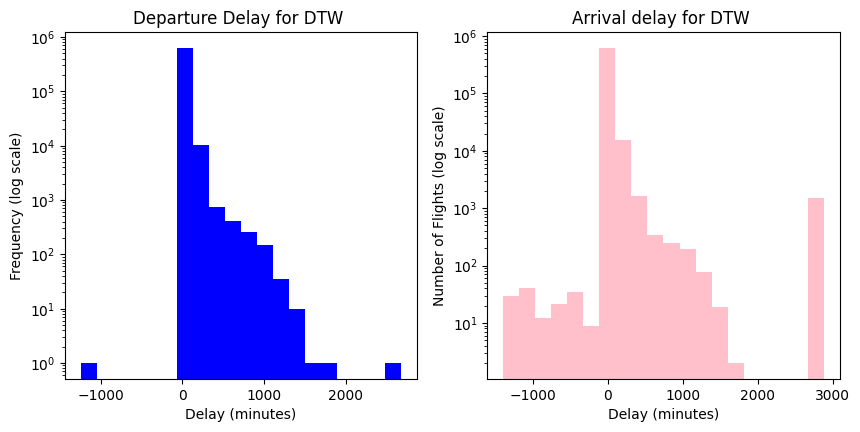

In [ ]:
 # Hist plts
plt.figure(figsize=(10,4.5)) # setting figure size
plt.subplot(1,2,1)
plt.hist(flights [flights['origin'] == 'DTW'] ['depDelay'], bins=20, color='blue') # plotting departure delay for DTW
plt.yscale('log') # setting logarthmic for y axis
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Departure Delay for DTW ')

plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'DTW'] ['arrDelay'], bins=20, color='pink',) # Plotting arrival delay for DTW
plt.yscale('log')
plt.xlabel('Delay (minutes)')
plt.ylabel('Number of Flights (log scale)')
plt.title('Arrival delay for DTW ')


Text(0.5, 1.0, 'Arrival Delay for MSP Airport')

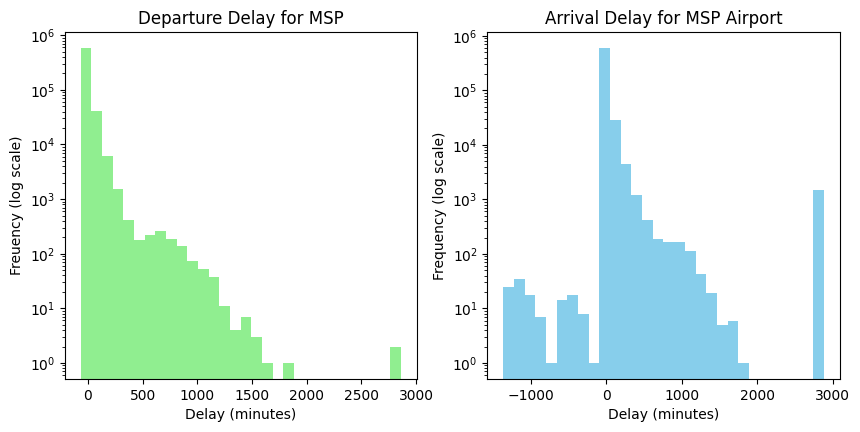

In [ ]:
# Histograms for MSP
plt.figure(figsize=(10,4.5))#setting figure size
plt.subplot(1,2,1) #subplot
plt.hist(flights[flights['origin'] == 'MSP']['depDelay'], bins=30, color='lightgreen')
plt.yscale('log')
plt.xlabel('Delay (minutes)')
plt.ylabel('Freuency (log scale)')
plt.title('Departure Delay for MSP')


plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'MSP']['arrDelay'], bins=30, color='skyblue')
plt.yscale('log')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Arrival Delay for MSP Airport')

Text(0.5, 1.0, 'Arrival delay for ORD Airport')

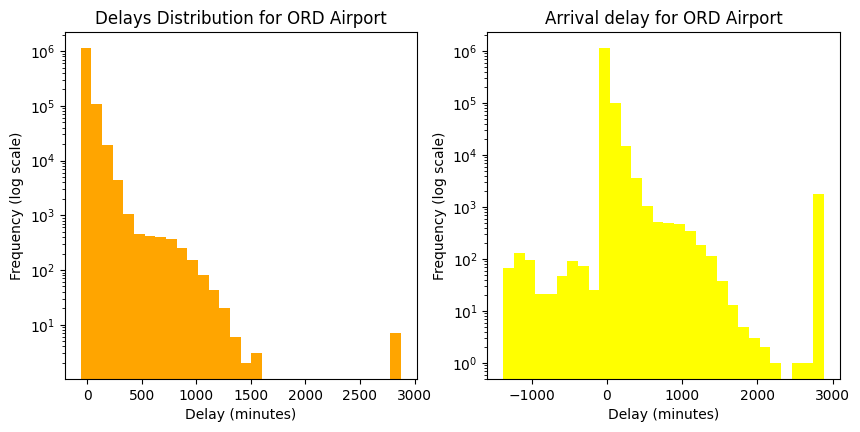

In [ ]:
# Histograms for ORD
plt.figure(figsize=(10,4.5)) # setting figure size
plt.subplot(1,2,1)
plt.hist(flights[flights['origin'] == 'ORD']['depDelay'], bins=30, color='orange') #plotting for deparature delay for ORD
plt.yscale('log')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Delays Distribution for ORD Airport')


plt.subplot(1,2,2)
plt.hist(flights[flights['dest'] == 'ORD']['arrDelay'], bins=30, color='yellow') # plotting for arrival delay for ORD
plt.yscale('log')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency (log scale)')
plt.title('Arrival delay for ORD Airport')

In [ ]:
# Calculate the mean and std. Dev. Depature Delay for flights leaving DTW/MSP/ORD
# Calculate the mean and std. Dev. Arrival Delay for flights arriving at DTW/MSP/ORD

meanDepDTW = flights[(flights['origin'] == 'DTW')]['depDelay'].mean() # Caluculating mean of departaure delay for fights leaving  DTW
stdDepDTW = flights[(flights['origin'] == 'DTW')]['depDelay'].std() #Caluculating standard deviation of departaure delay for fights leaving  DTW

meanArrDTW = flights[(flights['dest'] == 'DTW')]['arrDelay'].mean()# Calculating mean  of arrival delay for flights arriving at DTW
stdArrDTW = flights[(flights['dest'] == 'DTW')]['arrDelay'].std() # Calculating  std. dev. of arrival delay for flights arriving at DTW

meanDepMSP = flights[(flights['origin'] == 'MSP')]['depDelay'].mean() #Caluculating mean of departaure delay for fights leaving  MSP
stdDepMSP = flights[(flights['origin'] == 'MSP')]['depDelay'].std() #Caluculating std.dev of departaure delay for fights leaving  MSP

meanArrMSP = flights[(flights['dest'] == 'MSP')]['arrDelay'].mean()# Calculating mean  of arrival delay for flights arriving at MSP
stdArrMSP = flights[(flights['dest'] == 'MSP')]['arrDelay'].std()# # Calculating  std. dev. of arrival delay for flights arriving at MSP

meanDepORD = flights[(flights['origin'] == 'ORD')]['depDelay'].mean()# Caluculating mean of departaure delay for fights leaving  ORD
stdDepORD = flights[(flights['origin'] == 'ORD')]['depDelay'].std() #Calculating standard dev  of departaure delay for flights arriving at ORD


meanArrORD = flights[(flights['dest'] == 'ORD')]['arrDelay'].mean()# Calculating mean  of arrival delay for flights arriving at ORD
stdArrORD = flights[(flights['dest'] == 'ORD')]['arrDelay'].std()# Calculating standard deviation  of arrival delay for flights arriving at ORD




print("Depature Delay for flights leaving DTW")
print(" Mean:    ", meanDepDTW)
print(" Std Dev: ", stdDepDTW)

print("Arrival Delay for flights arriving in DTW")
print(" Mean:    ", meanArrDTW)
print(" Std Dev: ", stdArrDTW)

print("\nDepature Delay for flights leaving MSP")
print(" Mean:    ", meanDepMSP)
print(" Std Dev: ", stdDepMSP)

print("Arrival Delay for flights arriving in MSP")
print(" Mean:    ", meanArrMSP)
print(" Std Dev: ", stdArrMSP)

print("\nDepature Delay for flights leaving ORD")
print(" Mean:    ", meanDepORD)
print(" Std Dev: ", stdDepORD)

print("Arrival Delay for flights arriving in ORD")
print(" Mean:    ", meanArrORD)
print(" Std Dev: ", stdArrORD)

Depature Delay for flights leaving DTW
 Mean:     7.5927405833482196
 Std Dev:  43.61499268204409
Arrival Delay for flights arriving in DTW
 Mean:     7.45310878436443
 Std Dev:  146.47135753181988

Depature Delay for flights leaving MSP
 Mean:     6.539962945545101
 Std Dev:  43.04228296430272
Arrival Delay for flights arriving in MSP
 Mean:     5.970643524227963
 Std Dev:  146.964708833417

Depature Delay for flights leaving ORD
 Mean:     10.85803788002564
 Std Dev:  47.32238257717498
Arrival Delay for flights arriving in ORD
 Mean:     8.950908247357827
 Std Dev:  122.47955196588447


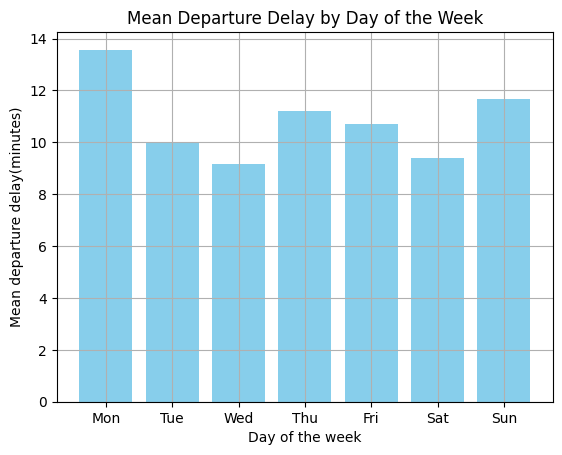

In [ ]:
flights['dateVal'] = pd.to_datetime(flights[['year', 'month', 'day']])
flights['day_week_val'] = flights['dateVal'].dt.dayofweek # extracting day of the week
mean = flights[flights['origin']=='ORD'].groupby('day_week_val')['depDelay'].mean() # caluculating mean
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.bar(days, mean,color ='skyblue')# plotting using bar plot
plt.xlabel('Day of the week')
plt.ylabel('Mean departure delay(minutes)')
plt.title('Mean Departure Delay by Day of the Week')
plt.grid()
# Showing the plot
plt.show()

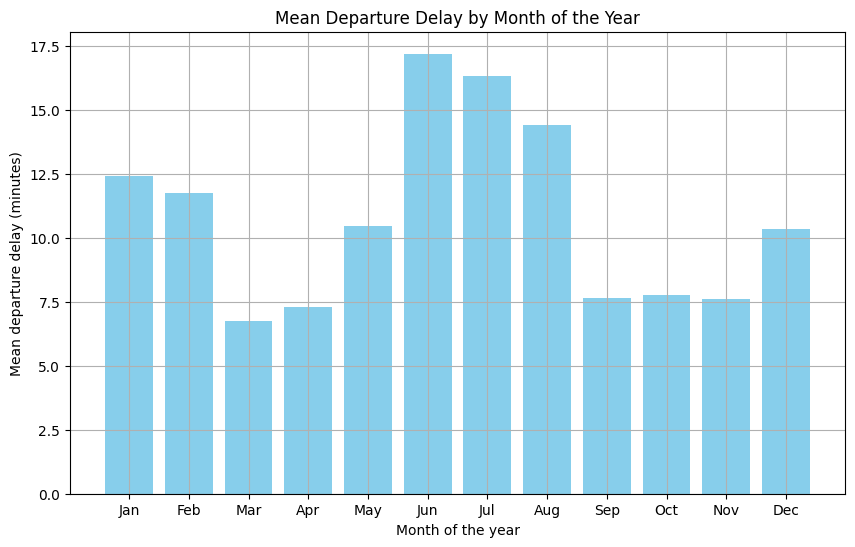

In [ ]:
# Create a bar plot with the mean dep. delay for each month.


flights['month_val'] = flights['dateVal'].dt.month# Extract month from the 'dateVal' column
mean_monthly_delay = flights[flights['origin']=='ORD'].groupby('month_val')['depDelay'].mean()# Calculating mean departure delay for flights departing from ORD by month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']# defining month labels
plt.figure(figsize=(10, 6)) # setting figure size
plt.bar(months, mean_monthly_delay, color='skyblue')# Plotting using bar plot
plt.xlabel('Month of the year')
plt.ylabel('Mean departure delay (minutes)')
plt.title('Mean Departure Delay by Month of the Year')
plt.grid()#adding grid
plt.show()# Showing the plot



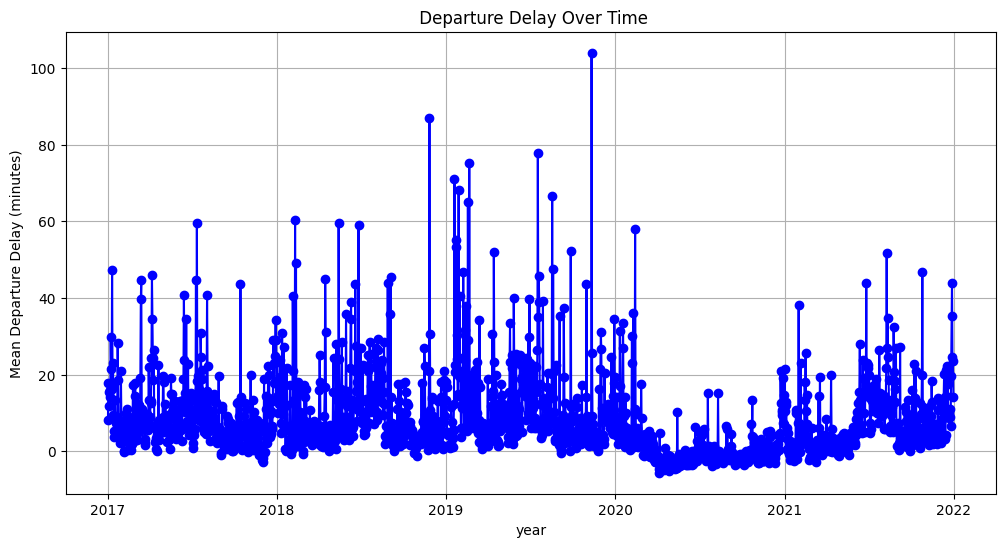

In [ ]:
flights['dateVal_a'] = pd.to_datetime(flights[['year', 'month', 'day']])
mean_departure_delay = flights.groupby('dateVal_a')['depDelay'].mean() # Grouping the flights data by date and calculating mean departure delay
plt.figure(figsize=(12, 6)) # giving figure size
plt.plot(mean_departure_delay, color='blue', marker='o', linestyle='-')
plt.xlabel('year')
plt.ylabel('Mean Departure Delay (minutes)')
plt.title(' Departure Delay Over Time')
plt.grid(True) # adding grid
plt.show() #displaying plot


During covid period the deparature delay of flights appears to be much higher compared to the remaining years.

In [ ]:
average_delay_by_tail = flights.groupby('tailNum')['depDelay'].agg(['mean', 'count'])

average_delay_by_tail.columns = ['mnDelay', 'num']
mean_delay = average_delay_by_tail.sort_values(by='mnDelay', ascending=False) # Sorting the DataFrame by mean delay in descending order
topDelayed = mean_delay.head(10)#  top 10 delay flights
topDelayed.reset_index(inplace=True)
print(topDelayed)


  tailNum  mnDelay  num
0  N727AN    659.0    2
1  N733AR    626.5    4
2  N785AA    538.0    1
3  N786AA    505.0    1
4  N7LRAA    411.5    2
5  N724AN    351.0    1
6  N206PS    287.0    1
7  N178UA    276.0    1
8  N7BDAA    270.0    1
9  N7LVAA    259.0    2
